# Análisis Parcial I (bank-additional)

### Importamos la librerías que vamos a necesitar

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import locale
locale.setlocale(locale.LC_TIME, "Spanish_Spain") # he necesitado buscar como hacer que python me reconozca algunas palabras (en este caso los meses de la columna 'date') en español, para poder trabajar con esos datos

'Spanish_Spain.1252'

### Añadimos algunos settings para mejorar la visualización de los datos

In [ ]:
pd.set_option('display.max_columns', None) # nos enseña todas las columnas
sns.set(style="whitegrid") # ayuda a la hora de insertar gráficos

### Importamos nuestro archivo csv y realizamos una copia para poder recuperar datos más adelante si fuera necesario

In [128]:
bnk_add = pd.read_csv("../Datos_Proyecto_EDA_Bruto/bank-additional.csv", sep=",", quotechar='"')

bnk_add_copy = bnk_add.copy()

### Primer resumen de la forma, tipos de datos y una muestra de los datos que vamos a estudiar

In [146]:
print("Nº de filas y de columnas: ", bnk_add.shape)

print("\nTipos de datos: ")
print(bnk_add.dtypes)

print("\nMuestra de las primeras 5 filas:")
bnk_add.head()

Nº de filas y de columnas:  (43000, 23)

Tipos de datos: 
age               float64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
latitude          float64
longitude         float64
id_                object
dtype: object

Muestra de las primeras 5 filas:


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,0.0,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### Primera comprobación de datos nulos y filas duplicadas

In [147]:
print("Valores nulos por columna:", bnk_add.isna().sum())

print("\nNº de filas duplicadas:", bnk_add.duplicated().sum())

Valores nulos por columna: age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

Nº de filas duplicadas: 0


### Primer resumen estadístico

In [58]:
print("Resumen (básico) estadístico por columnas:")
bnk_add.describe().T

Resumen (básico) estadístico por columnas:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,43000.0,20651.099047,11868.770913,0.000,10381.75000,20642.5000,30930.25000,41187.000
age,37880.0,39.977112,10.437957,17.000,32.00000,38.0000,47.00000,98.000
default,34019.0,0.000088,0.009390,0.000,0.00000,0.0000,0.00000,1.000
housing,41974.0,0.535998,0.498708,0.000,0.00000,1.0000,1.00000,1.000
loan,41974.0,0.155620,0.362499,0.000,0.00000,0.0000,0.00000,1.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.0000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.0000,3.00000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.00000,999.0000,999.00000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.0000,0.00000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.1000,1.40000,1.400


### Primera limpieza de datos

In [144]:
bnk_add = bnk_add.drop(columns=['Unnamed: 0']) # tras la primera comprobación podemos concluir que la columna 'Unnamed' es irrelevante, por lo tanto la eliminamos"

bnk_add = bnk_add.drop_duplicates() # por el momento no es necesario usarlo ya que como hemos comprobado antes, no existen filas duplicadas

bnk_add['age'] = bnk_add['age'].fillna(bnk_add['age'].median()) # debido al alto número de valores nulos en la columna 'age', considero que lo más eficiente es imputar esos valores con la mediana

bnk_add['job'] = bnk_add['job'].fillna('unknown') # en este caso, al ser una columna con datos de carácter categórico, se sustituirá los valores nulos por 'unknown' (desconocido)

bnk_add['education'] = bnk_add['education'].fillna('unknown') # lo mismo en este caso

bnk_add['marital'] = bnk_add['marital'].fillna(bnk_add['marital'].mode()[0]) # pese a ser una columna categórica, al existir tan pocos valores nulos, considero que lo más eficiente es sustituir dichos valores por la moda (el valor más común)

bnk_add['default'] = bnk_add['default'].fillna(0) # en los siguientes tres casos, al tratarse de columnas con dos opciones (si o no; 1 o 0), considero que se deben interpretar los valores nulos (NaN) como 0 (no)

bnk_add['housing'] = bnk_add['housing'].fillna(0)

bnk_add['loan'] = bnk_add['loan'].fillna(0)

In [ ]:
# para la limpieza de los valores nulos de las siguientes 4 columnas es necesario pasar del datatype 'object' a un datatype numérico, para después poder imputar aquellas columnas con valores nulos 

# el problema sucede al fijarse que nuestros datos numéricos utilizan la coma (,) como un separador decimal en vez del punto (.), por lo tanto antes de cambiar el tipo de dato habrá que sustituir la coma decimal por un punto

num_cols = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for col in num_cols:

    bnk_add[col] = bnk_add[col].astype(str).str.replace(",", ".")

    bnk_add[col] = pd.to_numeric(bnk_add[col], errors="coerce")

In [77]:
# una vez sustituido el separador decimal podemos cambiar el datatype

bnk_add['cons.price.idx'] = pd.to_numeric(bnk_add['cons.price.idx'], errors='coerce')

bnk_add['cons.conf.idx'] = pd.to_numeric(bnk_add['cons.conf.idx'], errors='coerce')

bnk_add['euribor3m'] = pd.to_numeric(bnk_add['euribor3m'], errors='coerce')

bnk_add['nr.employed'] = pd.to_numeric(bnk_add['nr.employed'], errors='coerce')

In [78]:
# solo 2 de estas 4 columnas tienen valores nulos, por lo que ahora sí podemos imputarlos con la mediana

bnk_add['cons.price.idx'] = bnk_add['cons.price.idx'].fillna(bnk_add['cons.price.idx'].median())

bnk_add['euribor3m'] = bnk_add['euribor3m'].fillna(bnk_add['euribor3m'].median())

In [79]:
# por último convertiremos la columna 'date' a datetime para poder extraer el mes, año o día de la semana, algo muy útil si luego vamos a trabajar con gráficos

bnk_add['date'] = pd.to_datetime(bnk_add['date'], format="%d-%B-%Y", errors='coerce')

In [80]:
bnk_add['date']

0       2019-08-02
1       2016-09-14
2       2019-02-15
3       2015-11-29
4       2017-01-29
           ...    
42995   2015-10-13
42996   2018-03-17
42997   2016-09-15
42998   2019-09-23
42999   2019-11-06
Name: date, Length: 43000, dtype: datetime64[ns]

### Segunda comprobación de datos nulos

In [ ]:
print("Valores nulos:")
bnk_add.isna().sum()

Valores nulos:


age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
date              248
latitude            0
longitude           0
id_                 0
dtype: int64

Como podemos comprobar, después de la primera limpieza hemos conseguido eliminar todos los valores nulos de las columnas a excepción de la columna 'date', ya que no considero ninguna otra opción para sustituir los valores nulos de dicha columna por otros

### Segundo análisis estadístico (más profundo)

In [90]:
print("Análisis estadístico por columnas:")
bnk_add.describe(include="all").T

Análisis estadístico por columnas:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
age,43000.0,NaN,NaN,NaN,39.741698,17.0,33.0,38.0,46.0,98.0,9.817735
job,43000,12,admin.,10873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,43000,3,MARRIED,26084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,43000,8,university.degree,12722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,43000.0,NaN,NaN,NaN,0.00007,0.0,0.0,0.0,0.0,1.0,0.008352
housing,43000.0,NaN,NaN,NaN,0.523209,0.0,0.0,1.0,1.0,1.0,0.499467
loan,43000.0,NaN,NaN,NaN,0.151907,0.0,0.0,0.0,0.0,1.0,0.358935
contact,43000,2,cellular,27396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,43000.0,NaN,NaN,NaN,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033
campaign,43000.0,NaN,NaN,NaN,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294


In [83]:
print("Varianza:")
bnk_add.var(numeric_only=True)

Varianza:


age                  96.387917
default               0.000070
housing               0.249467
loan                  0.128834
duration          66908.116795
campaign              7.685612
pdays             35066.455015
previous              0.247373
emp.var.rate          2.477156
cons.price.idx        0.332528
cons.conf.idx        21.503493
euribor3m             2.627950
nr.employed        5243.371073
latitude             52.214319
longitude           280.638951
dtype: float64

In [84]:
print("Desviación estándar:")
bnk_add.std(numeric_only=True)

Desviación estándar:


age                 9.817735
default             0.008352
housing             0.499467
loan                0.358935
duration          258.666033
campaign            2.772294
pdays             187.260394
previous            0.497366
emp.var.rate        1.573898
cons.price.idx      0.576652
cons.conf.idx       4.637186
euribor3m           1.621095
nr.employed        72.411125
latitude            7.225948
longitude          16.752282
dtype: float64

In [85]:
print("Media:")
bnk_add.median(numeric_only=True)

Media:


age                 38.0000
default              0.0000
housing              1.0000
loan                 0.0000
duration           179.0000
campaign             2.0000
pdays              999.0000
previous             0.0000
emp.var.rate         1.1000
cons.price.idx      93.7490
cons.conf.idx      -41.8000
euribor3m            4.8570
nr.employed       5191.0000
latitude            36.7610
longitude          -95.8995
dtype: float64

In [87]:
print("Moda:")
bnk_add.mode(numeric_only=True).iloc[0]

Moda:


age                 38.000
default              0.000
housing              1.000
loan                 0.000
duration            90.000
campaign             1.000
pdays              999.000
previous             0.000
emp.var.rate         1.400
cons.price.idx      93.994
cons.conf.idx      -36.400
euribor3m            4.857
nr.employed       5228.100
latitude            44.675
longitude         -109.152
Name: 0, dtype: float64

### Gráficas

Distribución de edades de los clientes:

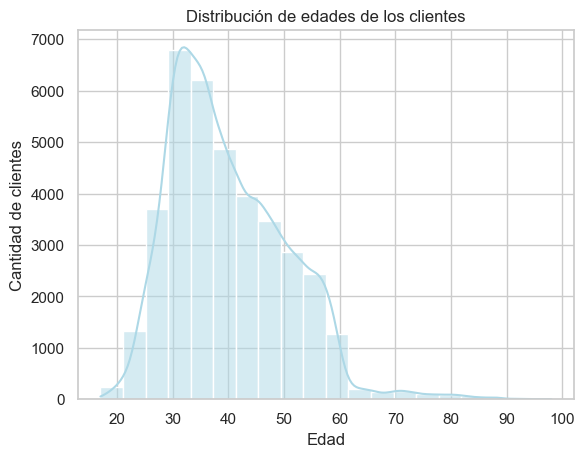

In [137]:
sns.histplot(bnk_add["age"], bins=20, color="lightblue", kde=True)
plt.title("Distribución de edades de los clientes")
plt.xlabel("Edad")
plt.ylabel("Cantidad de clientes")
plt.show()

La mayoría de los clientes tienen entre 30 y 40 años, una edad prudente pues no son ni muy jóvenes, ni muy mayores

Distribución de duración de llamadas (menores a 600 seg.):

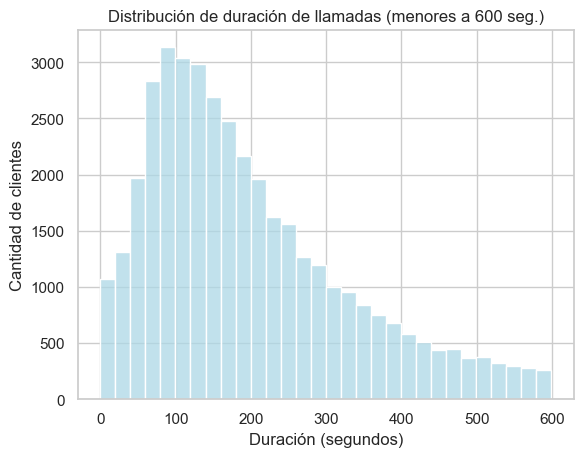

In [136]:
sns.histplot(bnk_add[bnk_add["duration"] < 600]["duration"], bins=30, color="lightblue")
plt.title("Distribución de duración de llamadas (menores a 600 seg.)")
plt.xlabel("Duración (segundos)")
plt.ylabel("Cantidad de clientes")
plt.show()

Lo más frecuente es que las llamadas de los clientes duren entre 60 y 160 segundos

Número de contactos realizados por cliente (<=10):

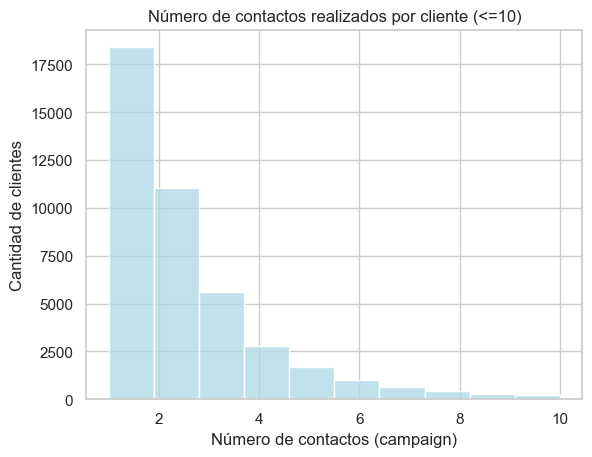

In [135]:
sns.histplot(bnk_add[bnk_add["campaign"] <= 10]["campaign"], bins=10, color="lightblue")
plt.title("Número de contactos realizados por cliente (<=10)")
plt.xlabel("Número de contactos (campaign)")
plt.ylabel("Cantidad de clientes")
plt.show()

Observamos como el número de clientes que llaman varias veces disminuye a medida que el número de estas (las llamadas) aumentan

Cantidad de clientes por tipo de contacto:

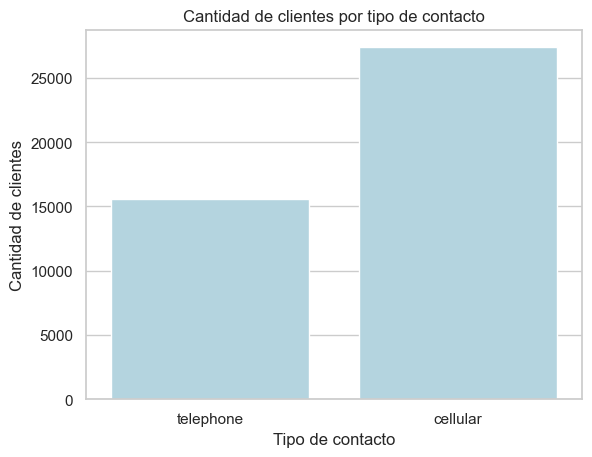

In [138]:
sns.countplot(x=bnk_add["contact"], color="lightblue")
plt.title("Cantidad de clientes por tipo de contacto")
plt.xlabel("Tipo de contacto")
plt.ylabel("Cantidad de clientes")
plt.show()

Es más frecuente contactar con clientes que usan teléfono móvil en vez de teléfono fijo

Cantidad de clientes por estado civil:

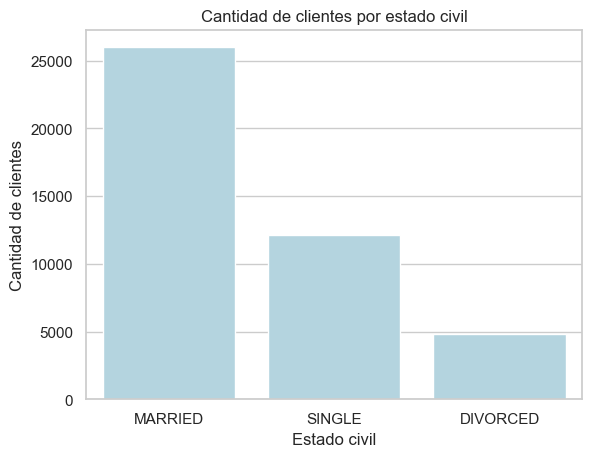

In [139]:
sns.countplot(x=bnk_add["marital"], color="lightblue")
plt.title("Cantidad de clientes por estado civil")
plt.xlabel("Estado civil")
plt.ylabel("Cantidad de clientes")
plt.show()

Observamos como la mayoría de los clientes están casados

### Ejemplos de filtrados, agrupaciones y creación de columnas

In [ ]:
clientes_llamada_larga = bnk_add[bnk_add["duration"] > 500] # clientes cuya última llamada sea de más de 500 segundos, lo que podemos considerar como una llamada larga

clientes_jovenes = bnk_add[bnk_add["age"] < 30] # clientes menores de 30 años (clientes jóvenes)

In [141]:
duracion_por_trabajo = bnk_add.groupby("job")["duration"].mean().sort_values(ascending=False) # duración de la llamada por puesto de trabajo

tasa_exito_educacion = bnk_add.groupby("education")["y"].apply(lambda x: (x=="yes").mean()).sort_values(ascending=False) # tasa de éxito por nivel educativo

In [94]:
bnk_add["ratio_campaign_prev"] = bnk_add.apply(lambda row: row["campaign"]/row["previous"] if row["previous"] > 0 else row["campaign"], axis=1) # aquí he tenido que usar una función lambda para sacar el ratio de las campañas actuales con las campañas pasadas

bnk_add["duration_warning"] = bnk_add["duration"].apply(lambda x: 1 if x > 500 else 0) # aviso de llamadas largas

bnk_add["credit_warning"] = bnk_add["loan"] + bnk_add["housing"] # aviso de préstamos

In [ ]:
clientes_riesgo = bnk_add.query("age > 50 & loan == 1 & housing == 1") # clientes mayores de 50 años que tienen un préstamo personal e hipotecario

In [142]:
print("Promedio de duración por job:\n", duracion_por_trabajo.head().round(2))

print("\nTasa de éxito por educación:\n", tasa_exito_educacion.head().round(3))

print("\nClientes con llamadas largas:\n", clientes_llamada_larga.shape)

print("\nClientes de riesgo filtrados:\n", clientes_riesgo.shape)

Promedio de duración por job:
 job
student          282.57
retired          272.53
blue-collar      263.93
self-employed    263.11
entrepreneur     260.62
Name: duration, dtype: float64

Tasa de éxito por educación:
 education
illiterate             0.222
university.degree      0.137
professional.course    0.113
high.school            0.108
basic.4y               0.103
Name: y, dtype: float64

Clientes con llamadas largas:
 (5118, 26)

Clientes de riesgo filtrados:
 (594, 26)


### Visualización del DataFrame tras las limpiezas y optimizaciones

In [145]:
bnk_add

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,0.0,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,38.0,admin.,MARRIED,university.degree,0.0,0.0,0.0,cellular,618,2,999,0,NONEXISTENT,1.4,"93,444","-36,1",NaN,"5228,1",yes,13-octubre-2015,38.147,-105.582,4eed05de-2a98-4227-b488-32122009b638
42996,34.0,technician,MARRIED,professional.course,0.0,1.0,1.0,cellular,42,7,999,0,NONEXISTENT,-0.1,"93,2",-42,NaN,"5195,8",no,17-marzo-2018,49.235,-112.201,0f0aca88-4088-4fe2-905f-44fb675d9493
42997,38.0,blue-collar,SINGLE,basic.6y,0.0,1.0,0.0,cellular,391,2,999,0,NONEXISTENT,1.4,"93,918","-42,7",NaN,"5228,1",no,15-septiembre-2016,40.679,-120.015,cadadd4b-7ee5-4019-b13a-ca01bb67ca5b
42998,38.0,admin.,MARRIED,university.degree,0.0,0.0,0.0,cellular,674,3,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,958","5228,1",no,23-septiembre-2019,27.772,-117.518,5f432048-d515-4bb5-9c94-62db451f88d4


### CSV con los datos actualizados del DataFrame limpio y optimizado

In [ ]:
bnk_add.to_csv("bnk_add_clean.csv", index=False) # paso los datos a un archivo csv para poder trabajar con ellos en otro archivo